##### ref https://realpython.com/generative-adversarial-networks/#your-first-gan

## Simple GANs Example

#### Introduction

This project focuses on the exploration of generative adversarial network (GAN). A [generative adversarial network (GAN)](https://en.wikipedia.org/wiki/Generative_adversarial_network) is a class of machine learning frameworks designed by Ian Goodfellow and his colleagues in 2014. Two neural networks contest with each other in a game in the form of a zero-sum game, where one agent's gain is another agent's loss. In this project, we explore the basic concepts and structures behind the generative adversarial networks. We also perform this neural network on different datasets to learn some interesting application of this model. All the code we provided is written in python3 in jupyter notebook. 

This notebook give an example of GANs where we train neural networks to generating a sine function $f(x) = sin(x)$ given a series of random number

### Import the essential pacakge
First we import the essential package, including:
1. pytorch which is the mainly package to build neural structure
2. matplotlib is used to visualize the data

In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

Set a random seed to reproduce the result

In [7]:
torch.manual_seed(111)

#### Create dataset

Create the training set. The training set a series of point on sine function $f(x) = sin(x)$ where $x \in [0, 2\pi]$.

In [8]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]

Visualize the plot

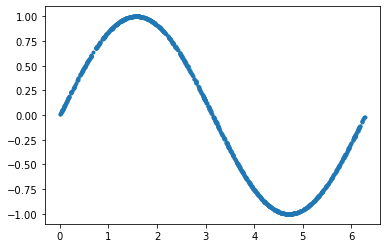

In [9]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

#### Build the model

The GANs consists of two neural networks, one called Discriminator and the other called Generator. The role of the generator is to estimate the probability distribution of the real samples in order to provide generated samples resembling real data. The discriminator, in turn, is trained to estimate the probability that a given sample came from the real data rather than being provided by the generator.

![s](./img/GANsStruct.jpg)

In [10]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [11]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

Instantiation

In [12]:
discriminator = Discriminator()
generator = Generator()

#### Set hyperparameters

In [13]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

#### Set the optimization object
What do optimizer do in neural network?

`Adam` combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

In [14]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

Training process:
1. Train the discriminator using real(1) data and fake(0) data. The discriminator will need to distinguish between the fake and real data points
2. Train the generator using random numbers as input and let discriminator to do the classify output from generator. The loss is the difference of the classification result and true labels, all of which is of value 1

In [16]:
def train(generator, discriminator, num_epochs, batch_size, train_loader):
    for epoch in range(num_epochs):
        for n, (real_samples, _) in enumerate(train_loader):
            # Data for training the discriminator
            real_samples_labels = torch.ones((batch_size, 1))
            latent_space_samples = torch.randn((batch_size, 2))
            generated_samples = generator(latent_space_samples)
            generated_samples_labels = torch.zeros((batch_size, 1))
            all_samples = torch.cat((real_samples, generated_samples))
            all_samples_labels = torch.cat(
                (real_samples_labels, generated_samples_labels)
            )

            # Training the discriminator
            discriminator.zero_grad()
            output_discriminator = discriminator(all_samples)
            loss_discriminator = loss_function(
                output_discriminator, all_samples_labels)
            loss_discriminator.backward()
            optimizer_discriminator.step()

            # Data for training the generator
            latent_space_samples = torch.randn((batch_size, 2))

            # Training the generator
            generator.zero_grad()
            generated_samples = generator(latent_space_samples)
            output_discriminator_generated = discriminator(generated_samples)
            loss_generator = loss_function(
                output_discriminator_generated, real_samples_labels
            )
            loss_generator.backward()
            optimizer_generator.step()

            # Show loss
            if epoch % 10 == 0 and n == batch_size - 1:
                print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
                print(f"Epoch: {epoch} Loss G.: {loss_generator}")

In [18]:
train(generator, discriminator, num_epochs, batch_size, train_loader)

Epoch: 0 Loss D.: 0.19172890484333038
Epoch: 0 Loss G.: 2.205277919769287
Epoch: 10 Loss D.: 0.6455698013305664
Epoch: 10 Loss G.: 0.8941397666931152
Epoch: 20 Loss D.: 0.643601655960083
Epoch: 20 Loss G.: 0.8925288915634155
Epoch: 30 Loss D.: 0.6730794906616211
Epoch: 30 Loss G.: 0.9668323993682861
Epoch: 40 Loss D.: 0.6405140161514282
Epoch: 40 Loss G.: 0.7298990488052368
Epoch: 50 Loss D.: 0.6809470057487488
Epoch: 50 Loss G.: 0.7750263214111328
Epoch: 60 Loss D.: 0.6326340436935425
Epoch: 60 Loss G.: 0.8059306144714355
Epoch: 70 Loss D.: 0.5179269313812256
Epoch: 70 Loss G.: 1.0993049144744873
Epoch: 80 Loss D.: 0.5927025675773621
Epoch: 80 Loss G.: 0.8768778443336487
Epoch: 90 Loss D.: 0.6255234479904175
Epoch: 90 Loss G.: 0.7707381248474121
Epoch: 100 Loss D.: 0.5345417857170105
Epoch: 100 Loss G.: 0.8872535228729248
Epoch: 110 Loss D.: 0.6842091083526611
Epoch: 110 Loss G.: 0.6737083196640015
Epoch: 120 Loss D.: 0.618989109992981
Epoch: 120 Loss G.: 1.0244462490081787
Epoch: 130

#### Prediction

Generate a series of random point and let the generator performs on these data poins and show the generated results

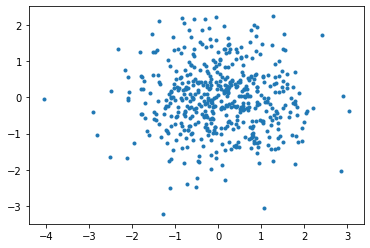

In [24]:
latent_space_samples = torch.randn(500, 2)
plt.plot(latent_space_samples[:, 0], latent_space_samples[:, 1], ".")
generated_samples = generator(latent_space_samples)

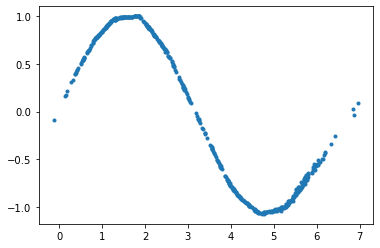

In [25]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")